<a href="https://colab.research.google.com/github/sbht04/ai-agents/blob/main/Calling_LLMs_Programmatically.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting to the LLM Ecosystem

This notebook demonstrates how to programmatically connect to the world's leading Large Language Models (LLMs). We cover two distinct strategies for integration:

Direct Provider SDKs: Connecting directly to OpenAI, Anthropic, and Google using their official Python libraries.

Unified Aggregators: Using OpenRouter to access any model (Llama 3, Mistral, Claude, GPT) using a single, standardized API format.

> This notebook requires you to set the keys in the colab secrets denoted by the key icon on the left sidebar of your screen.

**You'll need to set the following API KEYS using Colab Secrets**

1. OPENAI_APIKEY
2. CLAUDE_APIKEY
3. GEMINI_APIKEY
4. OPENROUTER_APIKEY

## Strategy 1: The "Siloed" Approach (Official SDKs)

Each major AI lab releases its own Python software development kit (SDK).

1. **OpenAI** (openai)

    The Standard: OpenAI's format (chat.completions.create) has effectively become the industry standard.

    Key Features: Simple message history list [{"role": "user", "content": "..."}].

    Best For: Accessing GPT-4o, GPT-4-Turbo, and legacy models directly.

2. **Anthropic** (anthropic)

    The Difference: Anthropic uses a slightly different syntax (client.messages.create). It separates "system instructions" into a specific parameter rather than including them in the message history list in some versions, though standard usage is similar.

    Key Features: Known for large context windows and safety.

    Best For: Accessing Claude 3.5 Sonnet and Claude 3 Opus.

3. **Google Gemini** (google-generativeai)

    The Difference: Google's API is distinct. It creates a GenerativeModel object and uses model.generate_content() rather than a chat completion style.

    Key Features: Native multimodal capabilities (video/image analysis) and very large context windows.

    Best For: Accessing Gemini 1.5 Pro and Flash.

In [ ]:
! pip install anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
import os
from openai import OpenAI
import anthropic
import google.generativeai as genai
from google.colab import userdata

In [ ]:
# --- 1. OPENAI (GPT-4, GPT-3.5) ---
def query_openai(prompt):
    """
    Connects to OpenAI's official API.
    """
    print(f"\n--- Querying OpenAI (GPT-4.1 Mini) ---")

    client = OpenAI(api_key=userdata.get('OPENAI_APIKEY'))

    try:
        response = client.chat.completions.create(
            model="gpt-4.1-mini",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"OpenAI Error: {e}"

In [ ]:
# --- 2. ANTHROPIC (Claude 3.5 Sonnet, Opus) ---
def query_anthropic(prompt):
    """
    Connects to Anthropic's official API.
    Note: Uses 'max_tokens' instead of 'max_completion_tokens' typically.
    """
    print(f"\n--- Querying Anthropic (Claude Haiku 4.5) ---")

    client = anthropic.Anthropic(api_key=userdata.get('CLAUDE_APIKEY'))

    try:
        message = client.messages.create(
            model="claude-haiku-4-5",
            max_tokens=1024,
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        # Anthropic response structure is different from OpenAI
        return message.content[0].text
    except Exception as e:
        return f"Anthropic Error: {e}"

In [ ]:
# --- 3. GOOGLE (Gemini 2.5 Pro/Flash) ---
def query_gemini(prompt):
    """
    Connects to Google's Generative AI API.
    """
    print(f"\n--- Querying Google (Gemini 2.5 Flash) ---")

    try:
        genai.configure(api_key=userdata.get('GEMINI_APIKEY'))
        model = genai.GenerativeModel('gemini-2.5-flash')

        response = model.generate_content(prompt)
        return response.text
    except Exception as e:
        return f"Gemini Error: {e}"


### What is OpenRouter?

OpenRouter is a unified interface (an aggregator) that allows you to access almost any major LLM (GPT-4, Claude 3, Llama 3, Mistral, etc.) using a single standard API format (specifically, the OpenAI format).

### Why use it?

* One SDK: You only need the openai Python library to access Claude, Llama, and Mistral. You don't need to learn the anthropic SDK or others.

* Model Shopping: You can switch models just by changing a string (e.g., from gpt-4 to anthropic/claude-3-opus) without rewriting code.

* Cost: They usually charge the standard provider price (sometimes even slightly less for open models).

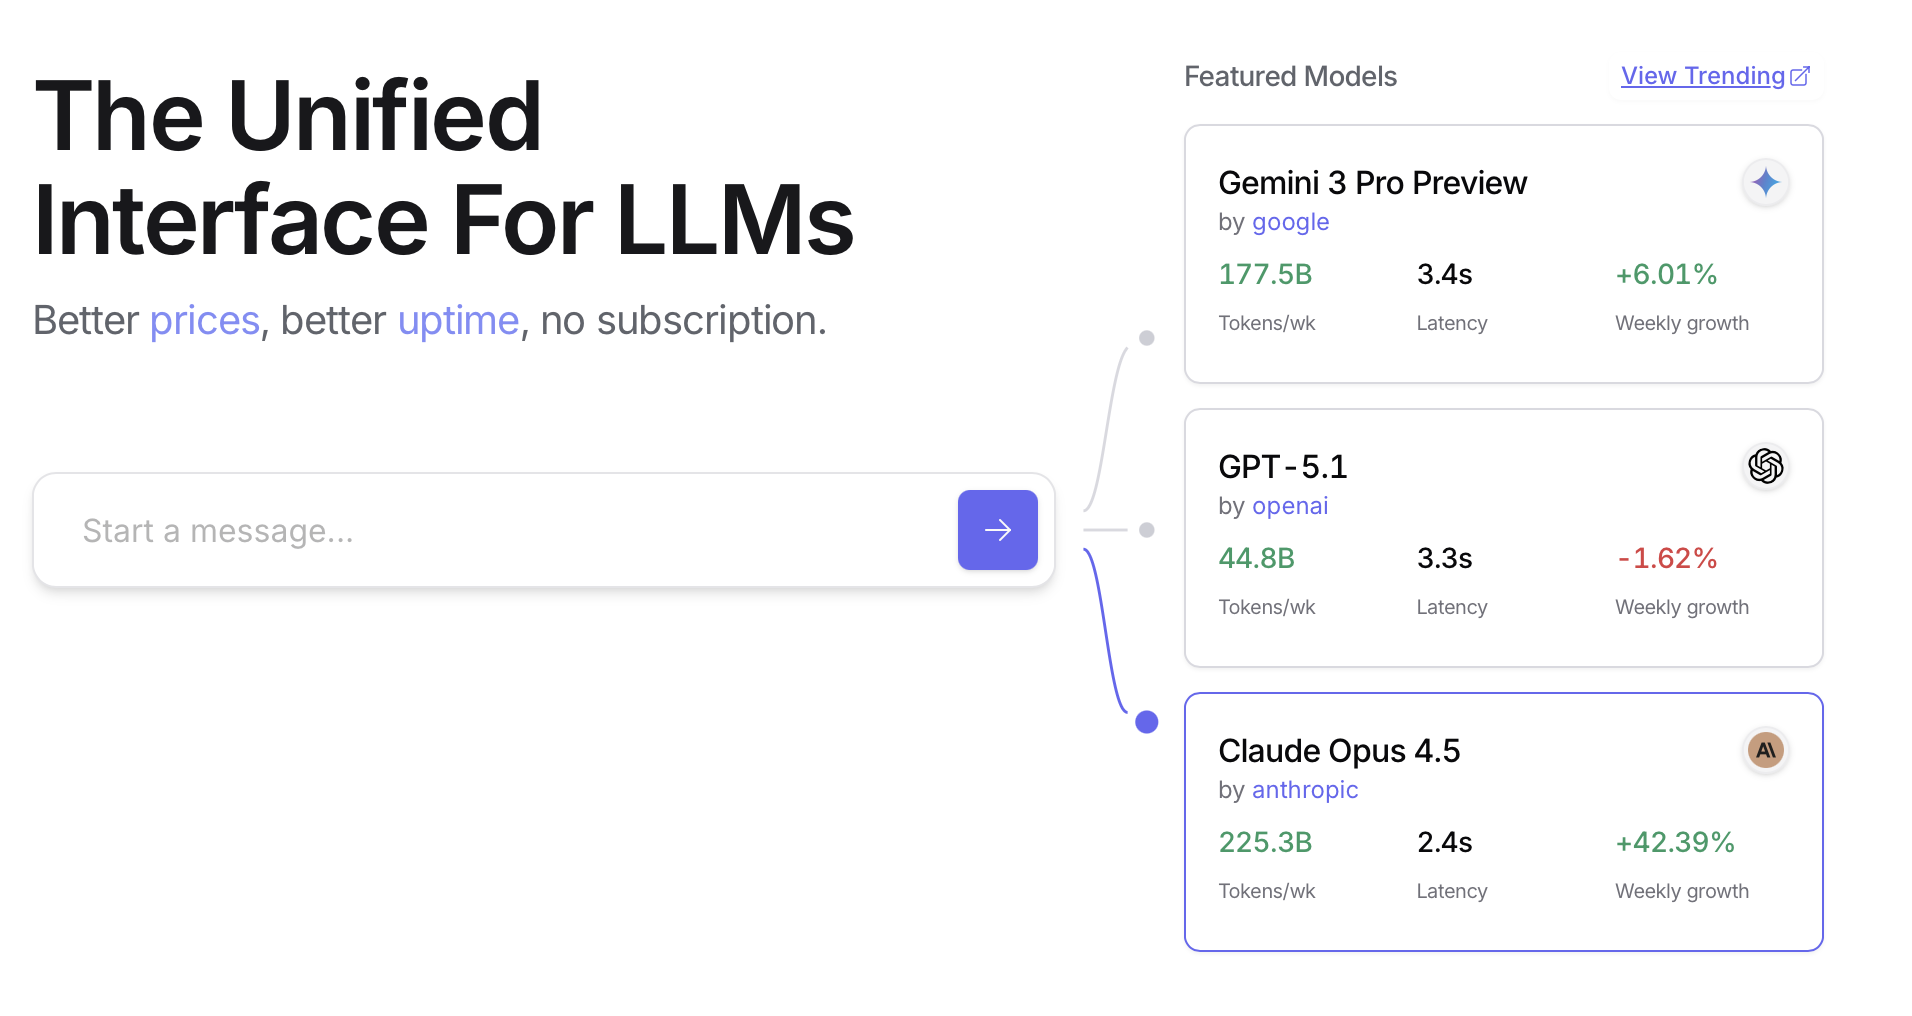

In [ ]:
def query_openrouter(prompt, model_name="meta-llama/llama-3.1-70b-instruct"):
    """
    Connects to OpenRouter.

    CRITICAL CONCEPT: OpenRouter uses the OpenAI Client library!
    We just change the 'base_url' to OpenRouter's endpoint.
    This allows us to access Claude, Llama, Mistral, etc., using OpenAI-style code.
    """
    print(f"\n--- Querying OpenRouter ({model_name}) ---")

    # We use the standard OpenAI library, but point it to OpenRouter
    client = OpenAI(
        base_url="https://openrouter.ai/api/v1",
        api_key=userdata.get('OPENROUTER_APIKEY'),
    )

    try:
        response = client.chat.completions.create(
            # OpenRouter requires the 'provider/model-name' format
            model=model_name,
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"OpenRouter Error: {e}"


In [ ]:
test_prompt = "What is the point of using nosql databases in engineering systems in under 3 sentences"

In [ ]:
# 1. Test OpenAI
print(query_openai(test_prompt))



--- Querying OpenAI (GPT-4o) ---
NoSQL databases are used in engineering systems to handle large volumes of unstructured or semi-structured data with high scalability and flexibility. They enable rapid development and easy schema evolution, accommodating diverse data types without rigid schemas. This makes them ideal for real-time analytics, distributed data storage, and applications requiring high availability.


In [ ]:
# 2. Test Anthropic
print(query_anthropic(test_prompt))



--- Querying Anthropic (Claude Haiku 4.5) ---
Anthropic Error: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}, 'request_id': 'req_011CVvwv8Lf4cGY9GJ2W4RfN'}


In [ ]:
# 3. Test Gemini
print(query_gemini(test_prompt))


--- Querying Google (Gemini 1.5 Flash) ---
NoSQL databases provide flexible schemas, easily adapting to evolving data models common in engineering systems. They excel at horizontally scaling to manage vast, diverse datasets like sensor feeds or logs, offering high performance and agility where relational databases might struggle.


In [ ]:
# 4. Test OpenRouter (Accessing Grok 4 Fast 3 via OpenRouter)
# Notice we don't need a Grok API key, just the OpenRouter key.
print(query_openrouter(test_prompt, model_name="x-ai/grok-4-fast"))



--- Querying OpenRouter (x-ai/grok-4-fast) ---
NoSQL databases are used in engineering systems to efficiently manage large-scale, unstructured or semi-structured data that doesn't fit well into rigid relational schemas, such as sensor logs, real-time analytics, or IoT streams. They excel in horizontal scalability, allowing seamless distribution across multiple servers to handle high-velocity data without performance bottlenecks. This flexibility and cost-effectiveness make them ideal for modern engineering applications requiring rapid iteration and massive data ingestion.


In [ ]:
# 5. Test OpenRouter (Accessing Deepseek-R1 via OpenRouter)
# Same code, different model string!
print(query_openrouter(test_prompt, model_name="deepseek/deepseek-r1"))


--- Querying OpenRouter (deepseek/deepseek-r1) ---
NoSQL databases enable scalable handling of massive, unstructured data volumes and flexible schema evolution, crucial for modern applications like real-time analytics and IoT. They offer high performance for specific access patterns (e.g., key-value or document queries) and simplify horizontal scaling across distributed systems. This reduces operational complexity while supporting dynamic, rapidly evolving engineering requirements.
